<a href="https://colab.research.google.com/github/andrebelem/ASTOC/blob/main/SNIPPETS_Baixando_dados_de_boias%2C_grids%2C_BDs_entre_outros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração de dados

Bem-vindo ao nosso notebook sobre a extração de dados de importantes fontes oceanográficas, incluindo o **SiMCosta**, **PNBOIA**, **PIRATA**, **National Data Buoy Center** e outros. Aqui, exploraremos como acessar e consolidar diferentes tipos de dados dessas fontes em um único DataFrame, facilitando a análise e visualização dos dados oceanográficos. A combinação dessas fontes oferece uma visão abrangente das condições oceânicas em várias regiões, permitindo insights valiosos para pesquisadores e profissionais da área.

Nota Importante: (Atualização **Fev 2024**)<br>

É muito comum alguns dos provedores de dados mudar suas políticas de acesso, incluindo aqui a retirada do ar de alguns dados. Verifique sempre se o dado está disponível antes de rodar os exemplos. Mais algumas dicas:<br>
* Você pode obter os dados de uma boia com seu código através de um JSON diretamente pelo link (exemplo) https://simcosta.furg.br/q/stations/byName/rs5

In [ ]:
import pandas as pd

# Configurar pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

## SiMCosta

O “Sistema de Monitoramento da Costa Brasileira (SiMCosta)” (www.simcosta.furg.br) é uma rede integrada de boias meteo-oceanográficas, com funcionamento autônomo e capacidade de coletar regularmente variáveis oceanográficas e meteorológicas, transmitindo-as para uma central de processamento e, imediatamente disponibilizando ao público. O acesso é feito diretamente no site do SiMCosta mediante um cadastramento, e posteriormente via api ou download. Portanto, você pode baixar os dados nos formatos *csv*, *dat* ou *json* ou mesmo gerar o link de api para baixar diretamente os dados em um dataframe do `Pandas`. <br>

Neste caso, recomendamos o `JSON`, ou JavaScript Object Notation, que é um formato de arquivo leve e fácil de ler e escrever para troca de dados. Ele é comumente usado para transmitir dados entre um servidor e um navegador da web. O `JSON` é baseado em texto e consiste em pares de chave-valor, onde os dados são organizados em uma estrutura de objeto ou array.<br>

**DICA**: é importante você saber exatamente o que está extraindo. Os campos da API são diferentes entre dados oceanográficos, meteorológicos e perfil de correntes.

In [ ]:
# Exemplo, extrai os dados dos últimos 7 dias para a boia ID 515 (que é a BA-1)

# ** NOTA IMPORTANTE **
# Não necessáriamente há dados da boia nesse período de tempo. É sempre bom verificar no site do SiMCosta se a boia está ativa

import pandas as pd
import urllib
import json
from datetime import datetime

# Calcula o tempo inicial e final da pesquisa do API. O tempo que entra na API é .timestamp (número de segundos desde 1/1/1970)
time2 = (datetime.now() - datetime(1970, 1, 1)).total_seconds() # note que você pode trocar aqui para a data que você quiser.
# Basta alterar o datetime.now(), que enste caso está marcando como data final o momento que você rodar este script

time1 = time2 - 7*24*3600 # 7 dias em segundos

print(f'Recuperando dados nos tempos:\n'\
      f'time2 = {datetime.fromtimestamp(time1).strftime("%Y-%m-%d %H:%M:%S")}\n'\
      f'time1 = {datetime.fromtimestamp(time2).strftime("%Y-%m-%d %H:%M:%S")}')

url = f'https://simcosta.furg.br/api/intrans_data?boiaID=515&type=json&time1={int(time1)}&time2={int(time2)}&params=Avg_Sal,Avg_W_Tmp1,Avg_W_Tmp2,Avg_CDOM,Avg_Chl,Avg_DO,C_Avg_Dir_N'

# chamando os dados da boia pela api
df = pd.json_normalize(json.loads(urllib.request.urlopen(url).read()))
# e construindo o array de tempo datetime

# note que pode ser feito diretamente das colunas de tempo ou do timestamp
#df['timestamp'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head(5)

Recuperando dados nos tempos:
time2 = 2024-02-16 16:08:38
time1 = 2024-02-23 16:08:38


,timestamp,Avg_Sal,Avg_DO,Avg_W_Tmp1,Avg_Chl,Avg_CDOM,Avg_W_Tmp2,C_Avg_Dir_N
0,2024-02-16 16:21:40+00:00,36.86,4.37,29.36,0.34,0.32,30.45,174.509
1,2024-02-16 16:51:40+00:00,36.83,4.38,29.76,0.28,0.31,30.72,127.609
2,2024-02-16 17:21:40+00:00,36.85,4.38,30.02,0.30,2.60,31.08,139.079
3,2024-02-16 17:51:40+00:00,36.81,4.30,30.68,0.35,0.58,31.70,332.539
4,2024-02-16 18:21:40+00:00,36.87,4.27,30.15,0.30,0.52,31.27,184.929


Para os usuários do COLAB (versão 01-2024), ele vai dar sugestões de gráficos automáticos para qualquer dataframe pandas, o que é bastante útil.

In [ ]:
# note o tipo de variável que vocẽ tem nas colunas do seu dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   timestamp    336 non-null    datetime64[ns, UTC]
 1   Avg_Sal      336 non-null    float64            
 2   Avg_DO       336 non-null    float64            
 3   Avg_W_Tmp1   336 non-null    float64            
 4   Avg_Chl      336 non-null    float64            
 5   Avg_CDOM     336 non-null    float64            
 6   Avg_W_Tmp2   336 non-null    float64            
 7   C_Avg_Dir_N  336 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 21.1 KB


In [ ]:
# se você quiser ter certeza do delta-T da sua série, você pode usar isso aqui.
df['timestamp'].diff().mean()

## Dica: sua série pode conter falhas e nesse caso, o diff() retornará NaN. Uma sugestão aqui é usar df['timestamp'].diff().mean(skipna=False)

Timedelta('0 days 00:30:00')

Outro exemplo, baixando dados de corrente de uma das boias do SiMCosta em uma data específica....vamos usar o mesmo esquema de datas anteriormente. Lembre-se que você deve *garantir* que há dados disponíveis.

In [ ]:
import requests
import json

# URL do arquivo JSON
url = "https://simcosta.furg.br/q/stations/byName/rs5"

# Fazendo a solicitação HTTP
response = requests.get(url)

# Verificando se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Convertendo a resposta em um objeto Python
    data = response.json()
    # Imprimindo o conteúdo do arquivo JSON formatado
    print(json.dumps(data, indent=4))
else:
    # Se a solicitação falhar, imprime o código de status
    print("Erro ao acessar o arquivo JSON. Código de status:", response.status_code)


{
    "id": 10,
    "name": "rs5",
    "name_display": "RS-5",
    "installation": "2016-12-07T00:00:00.000Z",
    "city": "Rio Grande",
    "state": "RS",
    "responsible": "FURG",
    "header": "/L1 data \n/missing = NULL\n/Acknowledging or Crediting SiMCosta as Information Source : (Product or data name) courtesy of the Brazilian Coastal Monitoring System - SiMCosta  (www.simcosta.furg.br), Universidade Federal do Rio Grande - FURG./Disclaimer: All products published on this website are not intended to be used for navigational or operational purposes.\n/*Magnetic Declination Reference: Chulliat, A., S. Macmillan, P. Alken, C. Beggan, M. Nair, B. Hamilton, A. Woods, V. Ridley, S. Maus and A. Thomson, 2014. The US/UK World Magnetic Model for 2015-2020, NOAA National Geophysical Data Center, Boulder, CO, doi: 10.7289/V5TH8JNW\n/Anemometer measuring height: 3.0m",
    "adcp_header": "/sensor_mount = Buoy\n/ADCP_orientation = Downward\n\n/ADCP config:\n/Period: from 2019-02-10 18:21 UTC

In [ ]:
# Exemplo, extrai os dados em um determinaro período da boia ID 510 (que é a RS-5)

import pandas as pd # repetindo aqui, por ser um snippet
import urllib
import json
from datetime import datetime

time1 = datetime(2022, 6, 1).timestamp() # note que a construção agora usa *timestamp*
time2 = datetime(2022, 9, 1).timestamp()

print(f'Recuperando dados nos tempos:\n'\
      f'time2 = {datetime.fromtimestamp(time1).strftime("%Y-%m-%d %H:%M:%S")}\n'\
      f'time1 = {datetime.fromtimestamp(time2).strftime("%Y-%m-%d %H:%M:%S")}')

url = f'https://simcosta.furg.br/api/intrans_data?boiaID=515&type=json&time1={int(time1)}&time2={int(time2)}&params=perfil_correntes'

# chamando os dados da boia pela api
df = pd.json_normalize(json.loads(urllib.request.urlopen(url).read()))
# e construindo o array de tempo datetime

# note que pode ser feito diretamente das colunas de tempo ou do timestamp
#df['timestamp'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head(5)
df.index = df['timestamp'] # transforma o timestamp no index
print(f'o Delta-T dos perfis é {df["timestamp"].diff().median()}') # note que mudei para median porque deve haver interrupções na série

Recuperando dados nos tempos:
time2 = 2022-06-01 00:00:00
time1 = 2022-09-01 00:00:00
o Delta-T dos perfis é 0 days 00:30:00


In [ ]:
# vamos dar uma olhada na nossa série ...
df

,timestamp,Avg_Cell(001)_dir_n,Avg_Cell(002)_dir_n,Avg_Cell(003)_dir_n,Avg_Cell(004)_dir_n,Avg_Cell(005)_dir_n,Avg_Cell(006)_dir_n,Avg_Cell(007)_dir_n,Avg_Cell(008)_dir_n,Avg_Cell(009)_dir_n,...,Avg_Cell(027)_mag,Avg_Cell(028)_mag,Avg_Cell(029)_mag,Avg_Cell(030)_mag,Avg_Cell(031)_mag,Avg_Cell(032)_mag,Avg_Cell(033)_mag,Avg_Cell(034)_mag,Avg_Cell(035)_mag,Avg_Cell(036)_mag
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:21:40+00:00,2022-06-01 00:21:40+00:00,139.759,188.759,188.759,190.759,190.759,190.759,192.759,192.759,193.759,...,155,127,98,152,76,25,82,280,608,777
2022-06-01 00:51:40+00:00,2022-06-01 00:51:40+00:00,104.759,187.759,183.759,187.759,188.759,183.759,188.759,186.759,189.759,...,98,55,38,74,78,89,62,42,481,737
2022-06-01 01:21:40+00:00,2022-06-01 01:21:40+00:00,144.759,199.759,201.759,202.759,205.759,204.759,203.759,203.759,200.759,...,27,38,51,106,116,52,29,45,338,743
2022-06-01 02:21:40+00:00,2022-06-01 02:21:40+00:00,114.759,125.759,144.759,113.759,93.759,91.759,81.759,53.759,63.759,...,209,185,184,193,163,34,16,28,24,76
2022-06-01 03:21:40+00:00,2022-06-01 03:21:40+00:00,56.759,64.759,53.759,61.759,60.759,59.759,58.759,56.759,54.759,...,355,334,337,315,221,82,23,2,47,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 21:51:40+00:00,2022-08-31 21:51:40+00:00,63.766,63.766,63.766,67.766,72.766,73.766,70.766,67.766,67.766,...,114,129,134,131,61,131,76,48,31,128
2022-08-31 22:21:40+00:00,2022-08-31 22:21:40+00:00,122.766,107.766,116.766,119.766,119.766,117.766,122.766,126.766,126.766,...,318,312,333,331,261,216,73,79,35,112
2022-08-31 22:51:40+00:00,2022-08-31 22:51:40+00:00,165.766,138.766,155.766,168.766,169.766,165.766,168.766,171.766,175.766,...,374,350,326,334,289,238,141,96,35,87


Aqui, o resultado é em direção e magnitude das correntes obtidas pelo correntômetro. Podemos extrair diretamente uma matriz com o resultado de magnitude, e limitar até uma determinada coluna (ou profundidade).<br> **Informação importante**: você DEVE conhecer a estrutura de dados da boia ANTES de baixar os dados, como a profundidade em que está instalada, o *blank* e o tamanho da célula do correntômtreo, já que a API recupera apenas os dados medidos. Uma dica: quando você baixa os dados do site em *CSV* ou *Tab*, note que as primeiras linhas do arquivo contém todas as informações de cabeçalho com um descritor importante. Neste exemplo acima temos:<br>
```
/Period: from 2022-04-06 13:51 UTC:
/Sensor: Nortek Aquadopp Profiler Z-cell 600kHz
/First Cell Depth (m) = 0.71
/Second Cell Depth (m) = 1.21
/Number of Cells = 25
/Cell Size (m) = 1
/Blanking Distance (m) = 0.5
/Sensor head depth (m) = 0.71
```
**Importante**<br>
Neste exemplo, veja que o correntômetro é um *Aquadopp Z cell*, que tem mais 2 beams laterais que medem corrente 'exatamente' na cabeça do ADCP. Por isso, neste sensor a primeira célula fica na profundidade do sensor, sem contar o blanking distance. Já a segunda celula soma-se o blanking mais o cell size.

Veja aqui que a configuração é de **25** células, com um tamanho de **1 m** e que começa a marcar a partir da profundidade **0.71 m** (sensor head depth) e a segunda célula em **1.21** m, e assim por diante. Você pode ainda verificar essa informação através do *perfil de velocidades*. Mas note que a boia está instalada à 20 metros de profundidade. Por isso, devemos cortar em uma célula que não mostre a interferência do fundo, por exemplo, a célula 18. Note também que os valores de magnitude são em mm/s.

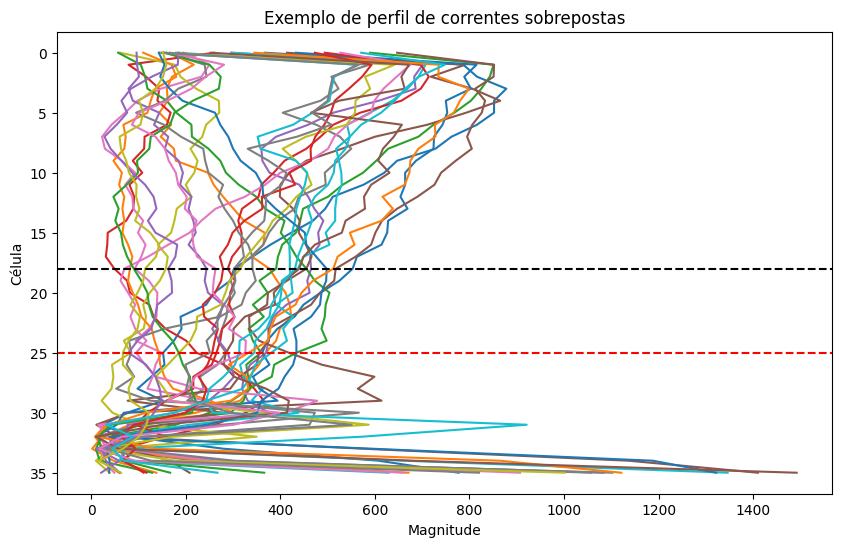

In [ ]:
# aqui eu seleciono apenas as velocidades da corrente, nos campos onde a coluna tem o nome "_mag"
speed = pd.concat([df[col] for col in df.columns if col.endswith('_mag')], axis=1)

# veja o que esta parte do script faz....
import matplotlib.pyplot as plt
import numpy as np

# Criar uma figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

for i in np.arange(0,120,4): # pulando à cada 2 horas, considerando que o delta-T é de 30 min
    ax.plot(speed.iloc[i,:].astype(float),np.arange(speed.shape[1])) # construindo perfil de correntes

# Adicionando uma linha horizontal em y=25 e y=18
ax.axhline(y=25, color='r', linestyle='--') # note que este é o número de células indicada no arquivo.
ax.axhline(y=18, color='k', linestyle='--')

# Inverter o eixo y
ax.invert_yaxis()
# Adicionando rótulos aos eixos e título ao gráfico
ax.set_xlabel('Magnitude')
ax.set_ylabel('Célula')
ax.set_title('Exemplo de perfil de correntes sobrepostas')

# Exibir o gráfico
plt.show()



Por último, vamos então plotar na forma 2D a magnitude das correntes por tempo, usando uma escala de cores, e cortando em 25 células que é a informação que consta como "válida" da boia.

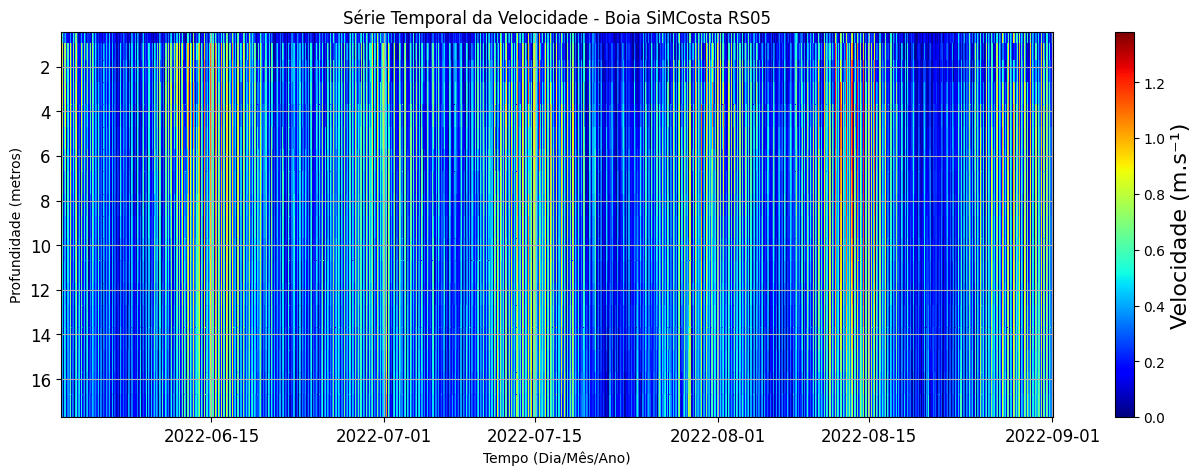

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cel_corte = 18 # numero de células para cortar
dZ = 1 # este é o tamanho da célula

mag = speed.iloc[:, :cel_corte].astype(float)/1000 # separa apenas até a coluna 25 como float e já passa para m/s

fig, ax = plt.subplots(figsize=(16, 5))

profundidade = np.concatenate(([0.71], np.arange(1.21, 1.21 + (cel_corte - 1) * dZ, dZ)))
p = ax.pcolor(df.index, profundidade, mag.T, shading='auto',cmap="jet") # note que estou transpondo a matriz

plt.box(True)
plt.grid(True)
plt.ylabel('Profundidade (metros)')
plt.xlabel('Tempo (Dia/Mês/Ano)')
plt.title(f'Série Temporal da Velocidade - Boia SiMCosta RS05')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.colorbar(p).set_label('Velocidade (m.s⁻¹)', fontsize=16)
plt.show()

Uma outra maneira de representar os valores de corrente é convertendo o arquivo todo em vetores e usando o `quiver`. Por exemplo:

In [ ]:
# Selecionamos as colunas de magnitude e direção
mag_cols = [col for col in df.columns if col.endswith('_mag')]
dir_cols = [col for col in df.columns if col.endswith('_dir_n')]

# Concatena as colunas de magnitude e direção
mag = df[mag_cols].astype(float).divide(1000)  # Convertendo para m/s
dir = df[dir_cols].astype(float)

# Define o número de células para cortar
cel_corte = 18

# Corta o DataFrame nas primeiras cel_corte células
mag = mag.iloc[:, :cel_corte]
dir = dir.iloc[:, :cel_corte]
# Converte direção e magnitude em componentes u e v
u = -mag.values * np.sin(np.radians(dir.values))
v = -mag.values * np.cos(np.radians(dir.values))

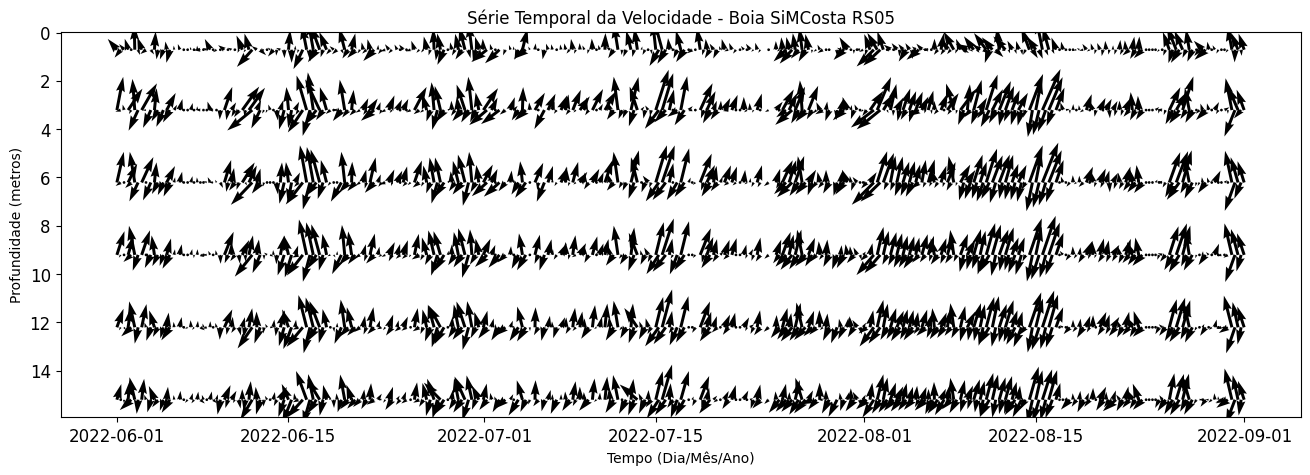

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))

profundidade = np.concatenate(([0.71], np.arange(1.21, 1.21 + (cel_corte - 1) * dZ, dZ)))
# Plota os vetores
ax.quiver(df.index[::12], profundidade[::3], u[::12,::3].T, v[::12,::3].T,units='xy',scale=10,scale_units='height')
# note que estamos pulando 12 posições no tempo e 3 em profundidade

# Adiciona rótulos aos eixos
plt.box(True)
plt.ylabel('Profundidade (metros)')
plt.xlabel('Tempo (Dia/Mês/Ano)')
plt.title(f'Série Temporal da Velocidade - Boia SiMCosta RS05')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='both', which='major', labelsize=12)

plt.show()


Basicamente, trabalhar com perfil de correntes é uma *arte*! E vale muito a pena você fazer alguns testes para ter certeza do que está plotando. Aqui, a ideia é mostrar que no modo exploratório, é possível criar pequenos *snippets* para facilitar o processo.l

#PNBOIA e REMO

O PNBOIA consiste em duas redes de boias, uma de deriva e outra de fundeio, cobrindo extensas áreas do Atlântico Sul e Tropical, coletando dados meteorológicos e oceânicos. Todo o sistema de disponibilização de dados mudou recentemente (atualização Fev. 2024) e os dados devem ser requisitados diretamente ao Banco Nacional de Dados Oceanográficos (BNDO). Porém, ainda existe "algum tipo de dado" via [Infraestrutura de Dados Espaciais Marinhos da DHN (IDEM-DHN)](https://idem.dhn.mar.mil.br/) ou clique diretamente [aqui neste link](https://www.marinha.mil.br/chm/dados-do-goos-brasil/pnboia-mapa) para acesso as boias BMO que faz parte do projeto [REMO](http://www.rederemo.org/dados/). Infelizmente o sistema não possui suporte para download diretamente em um `dataframe` por conta de problemas de segurança (SSL ou Secure Sockets Layer). O usuário deve baixar diretamente os dados no seu computador se quiser trabalhar com ele. Enfim....a história é longa.

**Para facilitar**

Uma cópia dos dados das boias BMO da REMO e da Spotter de Alcatrazes está disponível via [Github](https://github.com/andrebelem/ASTOC/tree/main/dados_publicos). Note que estes dados são uma cópia e se você vai utiliza-los para algum trabalho, procure os originais diretamente na fonte. Use por sua conta e risco !

In [ ]:
# aqui usamos como exemplo a boia da REMO na Bacia de Campos
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/andrebelem/ASTOC/main/dados_publicos/metocean_bacia-de-campos-ax23_qualificados_publicos.csv')
df['date_time'] = pd.to_datetime(df.date_time) # converte o index para tempo
df.index = df.date_time


In [ ]:
df # note que os dados não possuem um descritor (mesmo no site original !)

,date_time,latitude,longitude,battery,flag_battery,rh,flag_rh,wspd1,flag_wspd1,wdir1,...,swvht2,flag_swvht2,tp2,flag_tp2,wvdir2,flag_wvdir2,flag_latitude,flag_longitude,pres2,flag_pres2
date_time,,,,,,,,,,,,,,,,,,,,,
2023-07-25 02:00:00,2023-07-25 02:00:00,-22.8846,-43.1340,12.8,0,95.0,9,0.45,0,44,...,-9999.00,2,-9999.0,2,88,0,0,0,1020.4,0
2023-07-25 03:00:00,2023-07-25 03:00:00,-22.8846,-43.1340,12.7,0,87.3,9,0.68,0,35,...,-9999.00,2,-9999.0,2,68,0,0,0,1020.2,0
2023-07-25 04:00:00,2023-07-25 04:00:00,-22.8846,-43.1340,12.7,0,86.5,9,0.79,0,52,...,-9999.00,2,-9999.0,2,31,0,0,0,1020.0,0
2023-07-25 05:00:00,2023-07-25 05:00:00,-22.8846,-43.1340,12.7,0,88.3,9,0.45,0,132,...,-9999.00,2,-9999.0,2,213,0,0,0,1019.7,0
2023-07-25 06:00:00,2023-07-25 06:00:00,-22.8846,-43.1340,12.6,0,90.0,9,0.68,0,350,...,-9999.00,2,-9999.0,2,79,0,0,0,1019.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29 22:00:00,2023-08-29 22:00:00,-23.0171,-40.8581,12.8,0,94.3,9,10.26,0,136,...,2.70,0,7.8,0,-9999,1,0,0,1019.7,0
2023-08-29 23:00:00,2023-08-29 23:00:00,-23.0172,-40.8580,12.6,0,97.9,9,9.07,0,101,...,2.63,0,8.8,0,84,0,0,0,1020.7,0
2023-08-30 00:00:00,2023-08-30 00:00:00,-23.0170,-40.8582,12.8,0,96.6,9,10.26,0,106,...,2.84,0,8.3,0,336,0,0,0,1021.0,0


In [ ]:
# note que há valores -9999 (quando não há dados)
import numpy as np
df.replace(-9999, np.nan, inplace=True)

In [ ]:
# posso ter uma ideia da distribuição dos valores de cada variável por aqui
df.describe()

,latitude,longitude,battery,flag_battery,rh,flag_rh,wspd1,flag_wspd1,wdir1,flag_wdir1,...,swvht2,flag_swvht2,tp2,flag_tp2,wvdir2,flag_wvdir2,flag_latitude,flag_longitude,pres2,flag_pres2
count,821.000000,821.000000,821.000000,821.0,789.000000,821.000000,791.000000,821.000000,791.000000,821.000000,...,363.000000,821.000000,359.000000,821.000000,745.000000,821.000000,821.0,821.0,789.000000,821.000000
mean,-22.941272,-42.212347,13.147625,0.0,87.363878,8.644336,4.431252,0.054811,174.967130,0.046285,...,1.957631,1.119367,9.713370,1.191230,148.704698,0.092570,0.0,0.0,1017.457668,0.038977
std,0.068581,1.110132,0.514696,0.0,10.426028,1.663139,4.143785,0.395914,120.281669,0.284222,...,0.589181,1.006262,3.144471,1.137486,82.019921,0.290006,0.0,0.0,4.778657,0.193658
min,-23.136200,-43.150000,11.200000,0.0,33.200000,0.000000,0.110000,0.000000,0.000000,0.000000,...,0.130000,0.000000,2.100000,0.000000,0.000000,0.000000,0.0,0.0,1004.900000,0.000000
25%,-23.016800,-43.134000,12.800000,0.0,83.200000,9.000000,1.010000,0.000000,74.500000,0.000000,...,1.700000,0.000000,7.300000,0.000000,83.000000,0.000000,0.0,0.0,1014.300000,0.000000
50%,-22.884600,-43.134000,12.900000,0.0,89.200000,9.000000,2.480000,0.000000,161.000000,0.000000,...,2.030000,2.000000,9.100000,2.000000,159.000000,0.000000,0.0,0.0,1018.300000,0.000000
75%,-22.884600,-40.858200,13.400000,0.0,94.600000,9.000000,8.045000,0.000000,289.000000,0.000000,...,2.285000,2.000000,12.200000,2.000000,204.000000,0.000000,0.0,0.0,1021.100000,0.000000
max,-22.884600,-40.854600,17.100000,0.0,100.000000,9.000000,15.650000,8.000000,359.000000,6.000000,...,4.030000,6.000000,28.400000,9.000000,359.000000,1.000000,0.0,0.0,1026.300000,1.000000


In [ ]:
print(f'o Delta-T dos perfis é {df.date_time.diff().median()}') # note que mudei para median porque deve haver interrupções na série
# aparentemente os dados são horários. Mas note que há um enorme desvio em posição (a boia derivou ?)

o Delta-T dos perfis é 0 days 01:00:00


In [ ]:
print(df.columns.tolist()) # para mostrar TODAS as variáveis

['date_time', 'latitude', 'longitude', 'battery', 'flag_battery', 'rh', 'flag_rh', 'wspd1', 'flag_wspd1', 'wdir1', 'flag_wdir1', 'wspd2', 'flag_wspd2', 'wdir2', 'flag_wdir2', 'gust1', 'flag_gust1', 'gust2', 'flag_gust2', 'atmp', 'flag_atmp', 'pres', 'flag_pres', 'srad', 'flag_srad', 'dewpt', 'flag_dewpt', 'sst', 'flag_sst', 'cspd1', 'flag_cspd1', 'cdir1', 'flag_cdir1', 'cspd2', 'flag_cspd2', 'cdir2', 'flag_cdir2', 'cspd3', 'flag_cspd3', 'cdir3', 'flag_cdir3', 'cspd4', 'flag_cspd4', 'cdir4', 'flag_cdir4', 'cspd5', 'flag_cspd5', 'cdir5', 'flag_cdir5', 'cspd6', 'flag_cspd6', 'cdir6', 'flag_cdir6', 'cspd7', 'flag_cspd7', 'cdir7', 'flag_cdir7', 'cspd8', 'flag_cspd8', 'cdir8', 'flag_cdir8', 'cspd9', 'flag_cspd9', 'cdir9', 'flag_cdir9', 'cspd10', 'flag_cspd10', 'cdir10', 'flag_cdir10', 'cspd11', 'flag_cspd11', 'cdir11', 'flag_cdir11', 'cspd12', 'flag_cspd12', 'cdir12', 'flag_cdir12', 'cspd13', 'flag_cspd13', 'cdir13', 'flag_cdir13', 'cspd14', 'flag_cspd14', 'cdir14', 'flag_cdir14', 'cspd15', 

Vamos fazer um plot simples de SST (Temperatura Superficial do Mar) e de PRESS (Pressão Atmosférica ao Nível do Mar) para ver a distribuição desses dados.

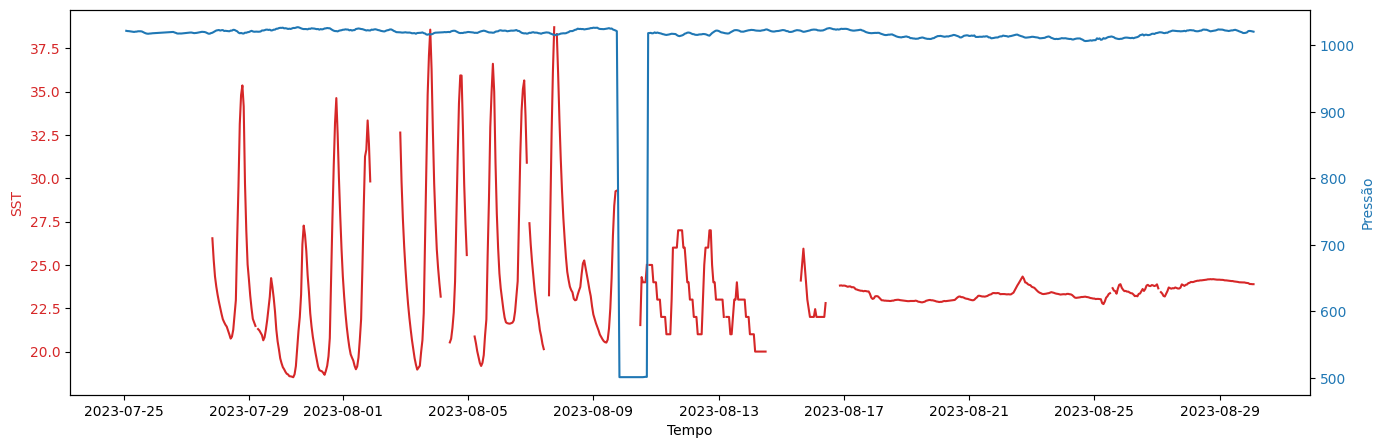

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df seja o seu DataFrame com as colunas 'sst' e 'pres'
# Plot das variáveis sst e pres
fig, ax1 = plt.subplots(figsize=(16, 5))

color = 'tab:red'
ax1.set_xlabel('Tempo')
ax1.set_ylabel('SST', color=color)
ax1.plot(df.index, df['sst'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instancia um segundo eixo y
color = 'tab:blue'
ax2.set_ylabel('Pressão', color=color)
ax2.plot(df.index, df['pres'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


Já deu para perceber que aqui é necessário um enorme trabalho de qualificação e limpeza de dados (se desejar).

# NDBC - National Data Buoy Center e o PIRATA

O [Centro Nacional de Dados de Bóias (NDBC)](https://www.ndbc.noaa.gov/), parte da Administração Nacional Oceânica e Atmosférica (NOAA), Serviço Nacional de Meteorologia (NWS), Escritório de Observações (OBS), fornece observações marinhas e costeiras em apoio aos objetivos da missão da NOAA, entre outras. Ele inclui também uma interface mais simples e direta para o projeto PIRATA (que também tem boias). Já o PIRATA (Prediction and Research Moored Array in the Tropical Atlantic ou Array de Bóias de Previsão e Pesquisa no Atlântico Tropical), é uma rede de observação multinacional, estabelecida para aprimorar nosso conhecimento e compreensão da variabilidade oceano-atmosférica no Atlântico tropical. É um projeto conjunto entre Brasil, França e Estados Unidos da América. Existem vários outros projetos e não dá para cobrir todos aqui.<br>

Obviamente, se você vai trabalhar especificamente com destes projetos, é aconselhável ir diretamente na fonte dos dados (por exemplo: https://www.aoml.noaa.gov/phod/epirata/ ou https://www.coriolis.eu.org/Observing-the-Ocean/OceanSITES-PIRATA2), mas fique atento porque o acesso não é *universal*.

Uma das vantagens do NDBC é que eles possuem uma API própria aqui https://pypi.org/project/ndbc-api/. Você pode instalar essa API no COLAB ou diretamente na sua environment do python.

In [ ]:
!pip install ndbc-api

  Preparing metadata (setup.py) ... done
  Created wheel for ndbc-api: filename=ndbc_api-0.24.1.6.1-py3-none-any.whl size=37525 sha256=38d2a07bde16e4703e19e60c51faf043c078cf6d6879b2384e577c52093ebc00
  Stored in directory: /root/.cache/pip/wheels/2e/7f/29/86389b21acefa2a33e3c8100b1f0a15a50536f144a69a9ff78
Successfully built ndbc-api


In [ ]:
# inicialização
from ndbc_api import NdbcApi

api = NdbcApi()

41041


**Obs**: Com base no mapa, escolha a estação (https://www.ndbc.noaa.gov/)

In [ ]:
sta = 31260 # dados da Ilha Rasa
# extrai station metadata
station_meta = api.station(station_id=sta)
# Transforma os dados de saida em um dataframe
station_df = api.station(station_id=sta, as_df=True)

In [ ]:
station_meta

{'Location': '23.031 S 43.088 W (23°1\'52" S 43°5\'17" W)',
 'Statation Type': 'Brazilian Navy Hydrographic Center, Buoy',
 'Name': 'Station 31260'}

In [ ]:
# ao invés de usar essa informação, vamos diretamente para os dados da boia PIRATA
api.available_realtime(station_id=sta)

{'Data for last 45 days: No data available.': {}}

In [ ]:
# Determine quais medições históricas estão disponíveis nesta estação.
api.available_historical(station_id=sta)

{'Historical data': {'Historical data': 'https://www.ndbc.noaa.govhistorical_data.shtml',
  'data descriptions': 'https://www.ndbc.noaa.gov/faq/measdes.shtml'}}

Note que não houve qualquer retorno de dados. Isso significa que "não há dados disponívels" na base do NDBC (!) A ideia aqui é apenas demonstrar que há um *universo* de bancos de dados para serem explorados. Ainda assim, o repositório é bastante interessante e contém mais fontes de dados. Por exemplo:<br>
* Sea Level Monitoring Facility: https://www.ioc-sealevelmonitoring.org/map.php
* Exemplo de como monitorar nível do mar usando dados do GNSS-IR https://psmsl.org/data/gnssir/gnssir_example.html
* Dados medidos no Porto do Forno, Arraial do Cabo https://www.ioc-sealevelmonitoring.org/bgraph.php?code=arrc2&output=csv

Entre outros.

# ERDDAP

Talvez um dos repositórios de dados mais poderosos da atualidade, o Programa de Acesso a Dados da Divisão de Pesquisa Ambiental (ou Environmental Research Division Data Access Program - ERDDAP) é uma ferramenta de visualização e conversão de dados desenvolvida pelo [Laboratório Ambiental de Pesca do Pacífico](https://coastwatch.pfeg.noaa.gov/), que pode incorporar múltiplos subconjuntos de dados de diferentes fontes em um único espaço de trabalho. O ERDDAP pode converter tipos de dados díspares em um formato comum e pode ser acessado diretamente do Python. Uma boa fonte de informação você encontra aqui https://www.ncei.noaa.gov/erddap/index.html.<br>

Da mesma forma que o NDBC, o ERDDAP também possui uma API para o python chamada `erddap-python`.

In [ ]:
!pip install erddapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
# vamos explorar aqui quais bancos de dados estão contidos no servidor abaixo
# Servidor https://coastwatch.pfeg.noaa.gov/erddap
from erddapy import ERDDAP

server = "https://coastwatch.pfeg.noaa.gov/erddap"
e = ERDDAP(
    server=server,
    protocol="tabledap",
    response="csv",
)

Agora podemos preencher o objeto com o identificador do conjunto de dados, as variáveis de interesse e suas restrições (por exemplo, "gliders" da última semana), usando `to_pandas` para baixar a resposta em formato CSV, e explorar o DataFrame resultante.

In [ ]:
e.dataset_id = "scrippsGliders"

e.variables = [
    "time",
    "latitude",
    "longitude",
    "temperature",
    "salinity"
]

e.constraints = {
    "time>=": "2023-01-01",
}

df = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

,latitude (degrees_north),longitude (degrees_east),temperature (Celsius),salinity (PSU)
time (UTC),,,,
2025-08-27 04:06:00+00:00,35.5302,-124.7633,6.176,34.191
2025-08-27 04:06:00+00:00,35.5302,-124.7633,6.200,34.192
2025-08-27 04:06:00+00:00,35.5302,-124.7633,6.202,34.191
2025-08-27 04:06:00+00:00,35.5302,-124.7633,6.230,34.192
2025-08-27 04:06:00+00:00,35.5302,-124.7633,6.261,34.194


In [ ]:
# explore os dados como quiser
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2025-08-27 04:06:00+00:00 to 2025-08-27 04:06:00+00:00
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude (degrees_north)  171 non-null    float64
 1   longitude (degrees_east)  171 non-null    float64
 2   temperature (Celsius)     171 non-null    float64
 3   salinity (PSU)            171 non-null    float64
dtypes: float64(4)
memory usage: 6.7 KB


Eu posso ainda extrair dados do PIRATA por aqui (sim !!! é possível !! se eles disponibilizaram os dados). Neste exemplo, vamos recuperar os dados de Altura Dinâmica da boia PIRATA 14S32W, a partir de 01-01-2023. Note que é necessário você entrar no subset de dados [aqui](https://coastwatch.pfeg.noaa.gov/erddap/tabledap/pmelTao5dayDyn.subset) para selecionar os itens com os valores corretos.

In [ ]:
e.dataset_id = "pmelTao5dayDyn" # qual é o dataset

e.variables = [ # quais são as variáveis
    "time",
    "latitude",
    "longitude",
    "depth",
    "DYN_13",
    "QD_5013"
]

e.constraints = { # quais são os constrainst da busca
    "time>=": "2023-01-01",
    "array=":"PIRATA",
    "station=":"14s32w"
}

df = e.to_pandas( # e transforma tudo em Pandas na saida
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

,latitude (degrees_north),longitude (degrees_east),depth (m),DYN_13 (dyn-cm),QD_5013
time (UTC),,,,,
2023-01-05 12:00:00+00:00,-14.0,328.0,0.0,100.80531,2.0
2023-01-10 12:00:00+00:00,-14.0,328.0,0.0,100.35506,2.0
2023-01-15 12:00:00+00:00,-14.0,328.0,0.0,100.34038,2.0
2023-01-20 12:00:00+00:00,-14.0,328.0,0.0,99.95161,2.0
2023-01-25 12:00:00+00:00,-14.0,328.0,0.0,99.76435,2.0


A mesma coisa pode ser feita para dados do tipo L3 ou L4 (em grade!), tais como saidas de modelos numéricos, dados de satélite, etc, o que é bastante útil. Vamos à um exemplo, neste caso, dados do ERSST versão 5 (NOAA Extended Reconstructed Sea Surface Temperature) que estão disponibilizados aqui https://coastwatch.pfeg.noaa.gov/erddap/griddap/nceiErsstv5.graph.<br>
Porém aqui vamos usar outra biblioteca api do erddap, o `erddapy`.

In [ ]:
!pip install erddap-python

In [ ]:
from erddapClient import ERDDAP_Griddap

remote = ERDDAP_Griddap('https://coastwatch.pfeg.noaa.gov/erddap', 'nceiErsstv5')
remote

In [ ]:
sst_subset = (remote.setResultVariables('sst').setSubset(
    time=slice("2010-01-15","2023-12-15"), # note a construção
    depth=0,
    latitude=slice(-28, -18),
    longitude=slice(314,324))
    .getxArray() )

/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  idx = self.values.index.get_loc(value, method=method)
/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  idx = self.values.index.get_loc(value, method=method)
/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  idx = self.values.index.get_loc(value, method=method)
/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing 

In [ ]:
sst_subset # sejam bem-vindos ao mundo do xarray !

<xarray.Dataset>
Dimensions:    (time: 168, depth: 1, latitude: 6, longitude: 6)
Coordinates:
  * time       (time) object 2010-01-15 00:00:00 ... 2023-12-15 00:00:00
  * depth      (depth) float64 0.0
  * latitude   (latitude) float64 -28.0 -26.0 -24.0 -22.0 -20.0 -18.0
  * longitude  (longitude) float64 314.0 316.0 318.0 320.0 322.0 324.0
Data variables:
    sst        (time, depth, latitude, longitude) float32 ...
Attributes: (12/71)
    acknowledgment:                The NOAA Extended Reconstructed Sea Surfac...
    cdm_data_type:                 Grid
    climatology:                   Climatology is based on 1971-2000 SST, Xue...
    comment:                       SSTs were observed by conventional thermom...
    contributor_name:              Huai-min Zhang
    contributor_role:              Chief, NOAA/NESDIS/NCEI/CCOG/OSB Ocean Sur...
    ...                            ...
    time_coverage_duration:        P1M
    time_coverage_end:             2023-12-15T00:00:00Z
    time_coverage_resolution:      P1M
    time_coverage_start:           1854-01-01T00:00:00Z
    title:                         NOAA ERSSTv5 (in situ only), 2�, Global, M...
    Westernmost_Easting:           0.0

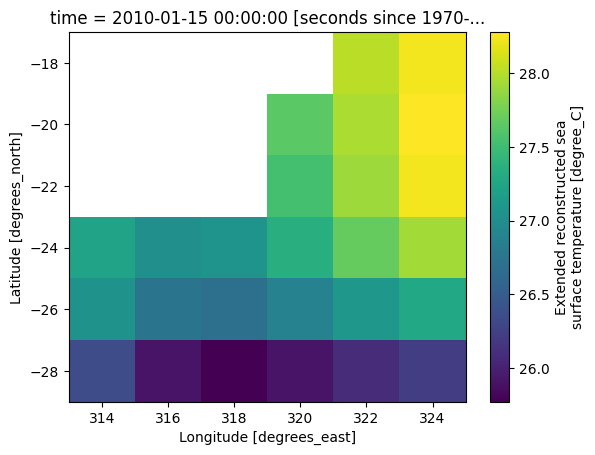

In [ ]:
sst_subset.sst.isel(time=0,depth=0).plot()

In [ ]:
# note que é importante entender o que está descrito aqui https://docs.xarray.dev/en/stable/user-guide/weather-climate.html
# calendário e conversão de datas é um universo a parte dentro do Python
sst_subset.time.head()

<xarray.DataArray 'time' (time: 5)>
array([cftime.DatetimeGregorian(2010, 1, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2010, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2010, 3, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2010, 4, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2010, 5, 15, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 2010-01-15 00:00:00 ... 2010-05-15 00:00:00
Attributes: (12/15)
    _nValues:             2040
    _evenlySpaced:        False
    _averageSpacing:      30 days 10h 38m 26s
    _dataType:            double
    _CoordinateAxisType:  Time
    actual_range:         (cftime.DatetimeGregorian(1854, 1, 1, 0, 0, 0, 0, h...
    ...                   ...
    delta_t:              0000-01-00
    ioos_category:        Time
    long_name:            Start Time
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00
    units:                seconds since 1970-01-01T00:00:00Z

<Axes: xlabel='time'>

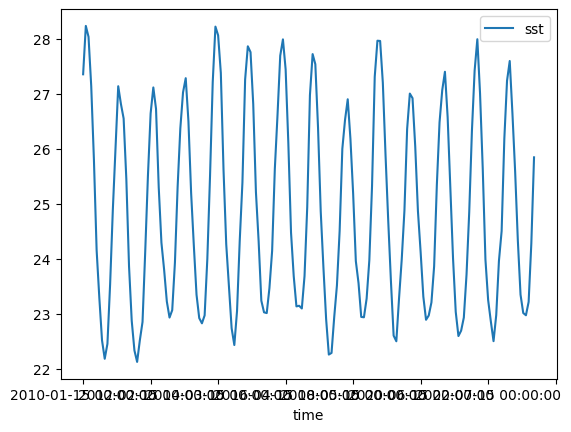

In [ ]:
# convertemos uma determinada seleção para um dataframe e plotamos
df = sst_subset.sst.sel(latitude=-24,longitude=320,depth=0).to_dataframe().drop(columns=['depth','latitude','longitude'])
df.plot()

Agora vamos as práticas de "o que fazer com essas séries" !